In [2]:
%load_ext autoreload
%autoreload 2

In [28]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from im2mesh import config, data
import torch
import pprint
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
os.chdir('..')

In [9]:
cfg = config.load_config('configs/domain_adaptation/chair_DA_DANN.yaml', 'configs/default.yaml')
train_dataset = config.get_dataset('train', cfg)
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=20, num_workers=1, shuffle=True,
    collate_fn=data.collate_remove_none,
    worker_init_fn=data.worker_init_fn)

In [23]:
for batch in train_loader:
    for key in batch:
        print("{} --> {}".format(key, batch[key].shape))
    imgs_source = batch['inputs'].cpu().detach().numpy()
    imgs_target = batch['inputs_target_domain'].cpu().detach().numpy()
    
    break

points --> torch.Size([20, 2048, 3])
points.occ --> torch.Size([20, 2048])
inputs --> torch.Size([20, 3, 224, 224])
inputs_target_domain --> torch.Size([20, 3, 224, 224])


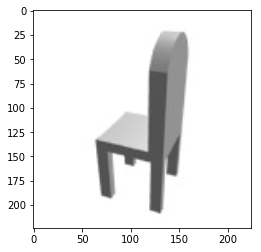

In [24]:
plt.imshow(imgs_source[10].transpose(1,2,0))

In [ ]:
# to benchmark:
# python -m torch.utils.bottleneck train.py configs/domain_adaptation/chair_DA_DANN_test.yaml --benchmark_mode